<a href="https://colab.research.google.com/github/ibrahimmhammed/projects/blob/main/Advanced_Houses_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")



**Reading  files**

In [ ]:
data_train = pd.read_csv("//content//train Boston.csv")
data_test = pd.read_csv("//content//test Boston.csv")


**Data Exploration**

In [ ]:
data_train.head()
data_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data_train["SalePrice"].describe() #describtive stat for prices

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Data Analysis**

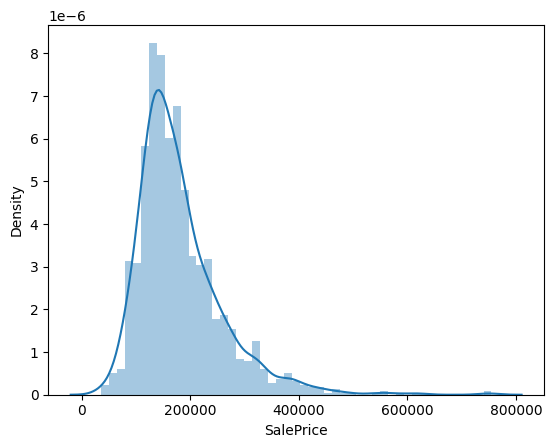

In [ ]:
sns.distplot(data_train["SalePrice"])
plt.show()

<Axes: >

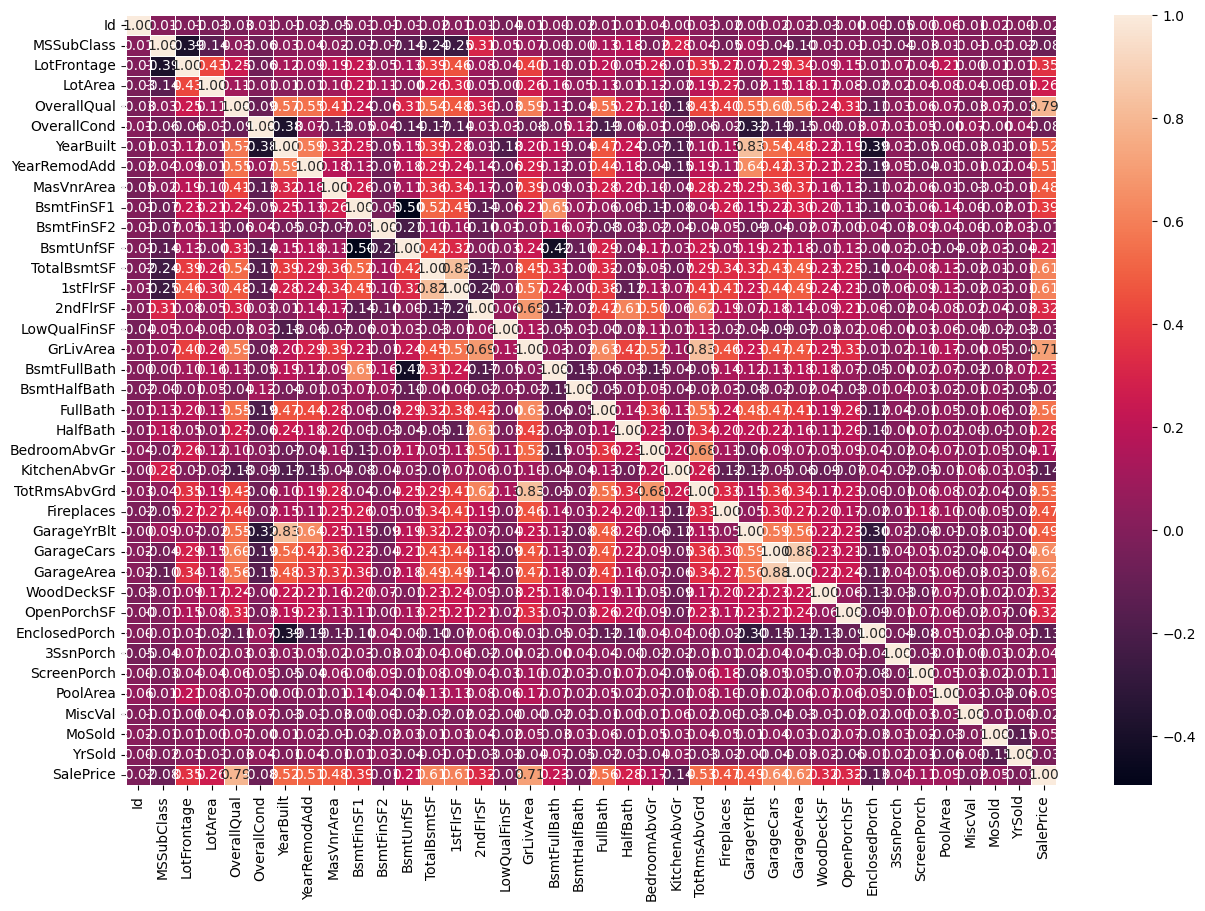

In [ ]:
#meausring correlation between numerical data
cor= data_train.corr()
f, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True,fmt=".2f",linewidth=.7)

<Axes: >

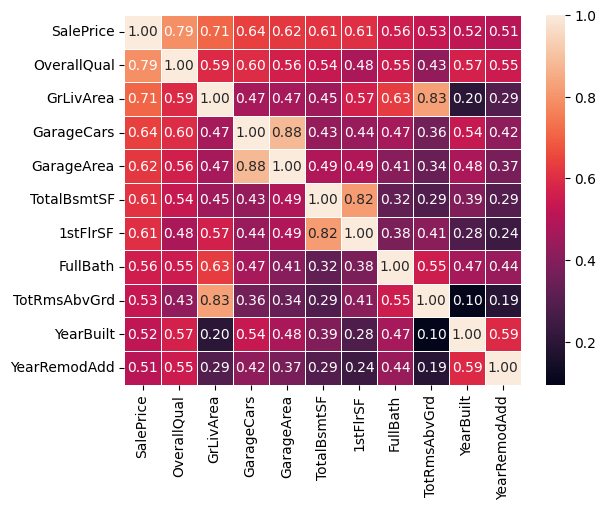

In [ ]:
#meausring top 10 correlation feauturs
k= 11
top10features=cor.nlargest(k,"SalePrice")["SalePrice"].index
top10corr= data_train[top10features].corr()

sns.heatmap(top10corr,annot=True,fmt=".2f",linewidth=.7)


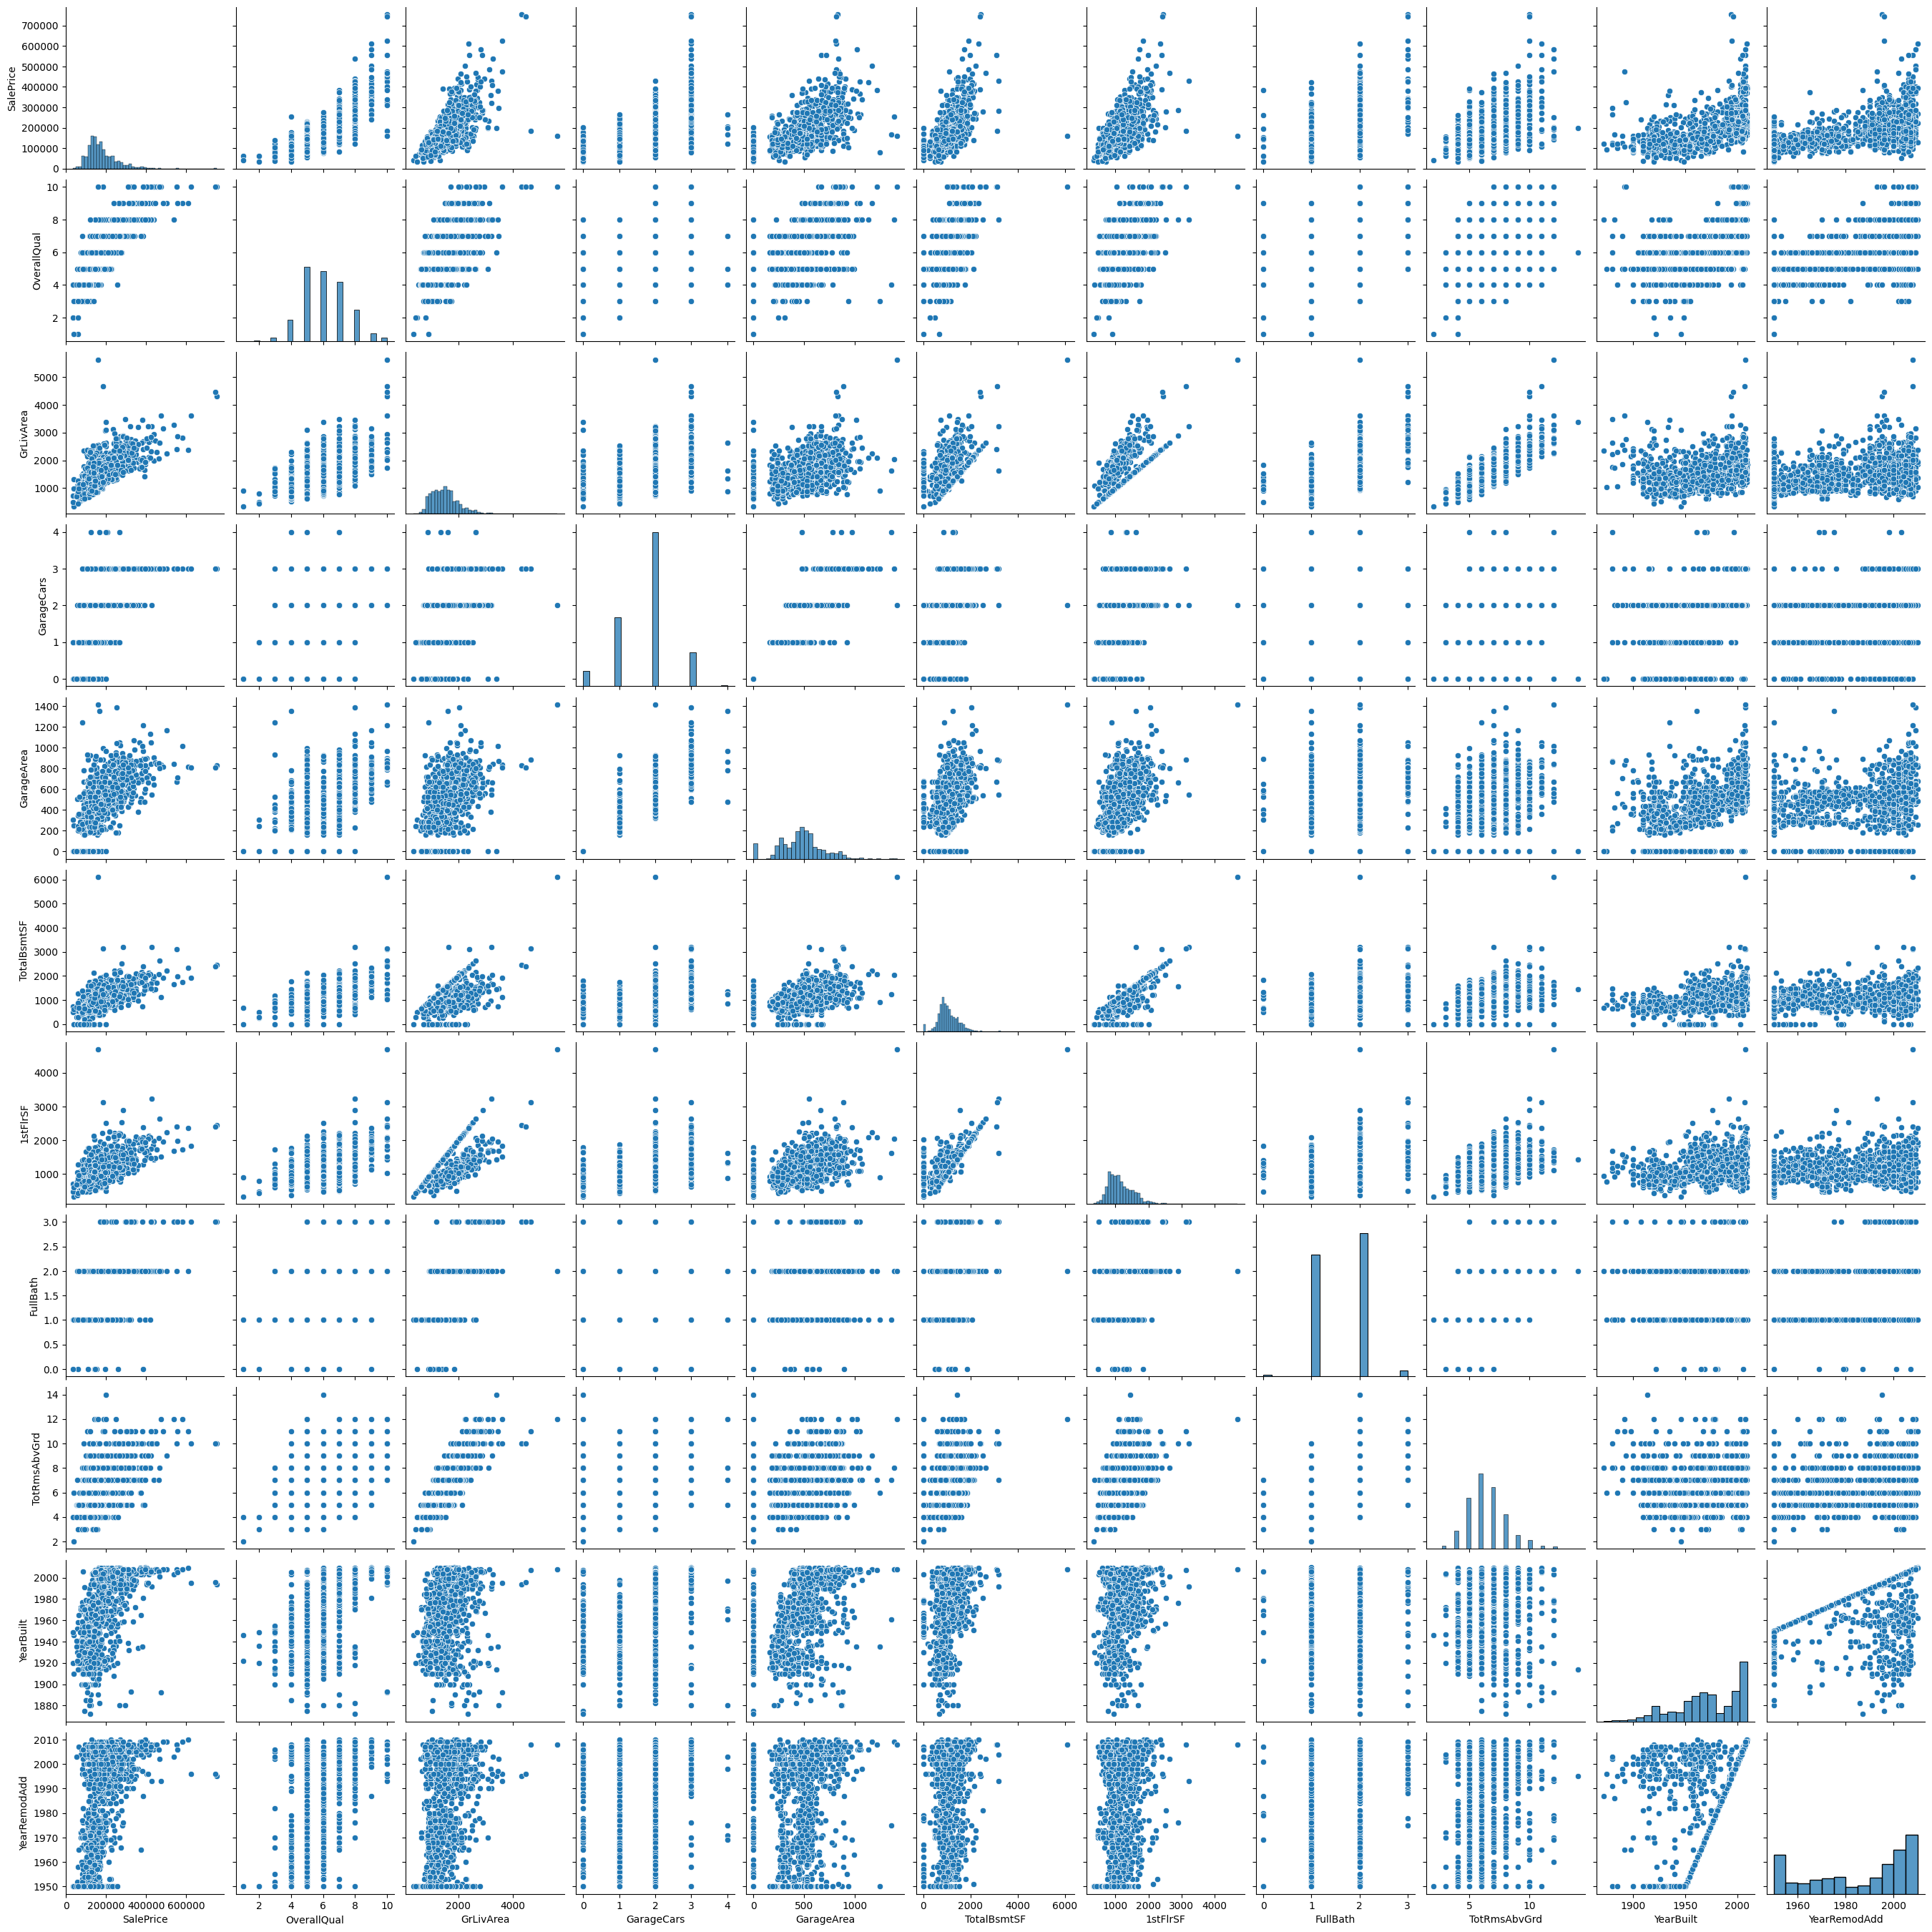

In [ ]:

# Create a dataframe with only the top 10 features
top_features_data = data_train[top10features]

# Plot the scatterplot matrix for the top 10 features
sns.pairplot(top_features_data, kind='scatter')

**Data Cleaning**

In [ ]:
isnll=data_train.isnull().sum()
missing_datatrain=isnll[isnll>0]
missing_datatrain #nulls in data_train

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
ifnll=data_test.isnull().sum()
missing_datatest=isnll[isnll>0]
missing_datatest #nulls in data_test

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
deleting_data_train = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  'FireplaceQu',
            'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PoolQC', 'Fence', 'MiscFeature']



In [ ]:
deleting_data_test = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  'FireplaceQu',
            'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PoolQC', 'Fence', 'MiscFeature']



In [ ]:
data_train.drop(deleting_data_train, axis=1, inplace=True) #deleting all features with null (except Electrical)


In [ ]:
data_test.drop(deleting_data_test, axis=1, inplace=True) #deleting all features with null (except Electrical )


In [ ]:
data_train = data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index) #deleting null in Electrical




In [ ]:
data_test= data_test.drop(data_test.loc[data_test['Electrical'].isnull()].index) #deleting null in Electrical


In [ ]:
data_train.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
data_test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
#converting data type

data_train = pd.get_dummies(data_train)
data_train.head()



,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data_test = pd.get_dummies(data_test)
data_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Get the common columns between data_train and data_test
common_columns = set(data_train.columns) & set(data_test.columns)

# Update data_train to include only the common columns and the SalePrice column
data_train = data_train[list(common_columns) + ["SalePrice"]]

# Update data_test to include only the common columns
data_test = data_test[list(common_columns)]



In [ ]:
data_test.isnull().sum() # i explored more nulls in data_test!!!

LandContour_Bnk         0
Neighborhood_ClearCr    0
Condition2_Artery       0
RoofStyle_Hip           0
Street_Pave             0
                       ..
BsmtFullBath            2
Neighborhood_Somerst    0
Neighborhood_BrDale     0
LandSlope_Gtl           0
Foundation_Wood         0
Length: 206, dtype: int64

In [ ]:
data_test= data_test.drop(data_test.loc[data_test['BsmtFullBath'].isnull()].index) #deleting null in bsmtfullbath


In [ ]:
null=data_test.isnull().sum()
null[null>0]


GarageArea    1
GarageCars    1
dtype: int64

In [ ]:
data_test= data_test.drop(data_test.loc[data_test['GarageArea'].isnull()].index) #deleting null in GarageArea
data_test= data_test.drop(data_test.loc[data_test['GarageCars'].isnull()].index) #deleting null in GarageCars



**Finally i deleted all nulls in data_test !!!**

In [ ]:
null=data_test.isnull().sum().max()



In [ ]:
data_train.isnull().sum().max()

0

**Creating Model**

In [ ]:
#difining our algorithms
model1= GradientBoostingRegressor()
model2= RandomForestRegressor()
model3= XGBRegressor()
model4= LinearRegression()
model5= DecisionTreeRegressor()
model6= SVR()

In [ ]:
x= data_train.drop(["SalePrice"],axis=1) #difining x
y= data_train["SalePrice"] #difining y



In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=.75,shuffle=True,random_state=44) #spliting data

In [ ]:
R2=[]
RMSE=[]
SCORE=[]
# to see all results together

In [ ]:
def testing(model): # to test all models and show their results
  model.fit(x_train,y_train)
  pred= model.predict(x_test)
  r2=r2_score(y_test,pred)
  rmse=np.sqrt(mean_squared_error(y_test,pred))
  score = model.score(x_test,y_test)
  R2.append(r2)
  RMSE.append(rmse)
  SCORE.append(score)
  print(f"Model score is {score}")
  print(f"rmse is {rmse}")
  print(f" r2 score is {r2}")





In [ ]:
testing(model1)

Model score is 0.9114327439491837
rmse is 24390.39029588724
 r2 score is 0.9114327439491837


In [ ]:
testing(model2)

Model score is 0.8867098631679956
rmse is 27585.33139784758
 r2 score is 0.8867098631679956


In [ ]:
testing(model3)

Model score is 0.9047733567545237
rmse is 25290.73161632048
 r2 score is 0.9047733567545237


In [ ]:
testing(model4)

Model score is 0.8394215355849686
rmse is 32841.71328800232
 r2 score is 0.8394215355849686


In [ ]:
testing(model5)

Model score is 0.7762265429402464
rmse is 38769.16440554413
 r2 score is 0.7762265429402464


In [ ]:
testing(model6)

Model score is -0.04854106240532152
rmse is 83921.81665313938
 r2 score is -0.04854106240532152


### THE BEST MODEL IS GRADIANT BOOSTING

In [ ]:
data_test
data_train

,LandContour_Bnk,Neighborhood_ClearCr,Condition2_Artery,RoofStyle_Hip,Street_Pave,SaleType_WD,KitchenQual_Ex,SaleType_CWD,HalfBath,PavedDrive_Y,...,SaleCondition_Abnorml,Neighborhood_StoneBr,LotShape_IR2,SaleType_ConLI,BsmtFullBath,Neighborhood_Somerst,Neighborhood_BrDale,LandSlope_Gtl,Foundation_Wood,SalePrice
0,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,208500
1,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,181500
2,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,223500
3,0,0,0,0,1,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,140000
4,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,175000
1456,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,210000
1457,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,266500
1458,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,142125


In [ ]:
#using algorithm with new data (test data)

Gradient_Boosting = GradientBoostingRegressor()
Gradient_Boosting.fit(x_train,y_train)


GradientBoostingRegressor()

In [ ]:
predicting= Gradient_Boosting.predict(data_test)


In [ ]:
#final results
ID = data_test.Id
new_df = pd.DataFrame({"id":ID,"SalePrice":predicting})
new_df



,id,SalePrice
0,1461,119600.921459
1,1462,168125.223172
2,1463,170766.610411
3,1464,183951.651301
4,1465,201933.260643
...,...,...
1454,2915,87278.209612
1455,2916,90190.205676
1456,2917,169426.336718
1457,2918,121401.344841


In [ ]:
output_file = '//content//predictions.csv'


# Save the DataFrame to a CSV file
new_df.to_csv(output_file, index=False)

In [ ]:
data_test.shape

(1456, 206)